<a href="https://colab.research.google.com/github/ThoshanRS10/Dotkonnekt/blob/main/THOSHAN_RS_W2_Dotkonnekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. CSV Data Exploration & Visualization

📂 Dataset Source: Titanic dataset from Github (you can also use seaborn’s built-in Titanic dataset for convenience).

First 10 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timot

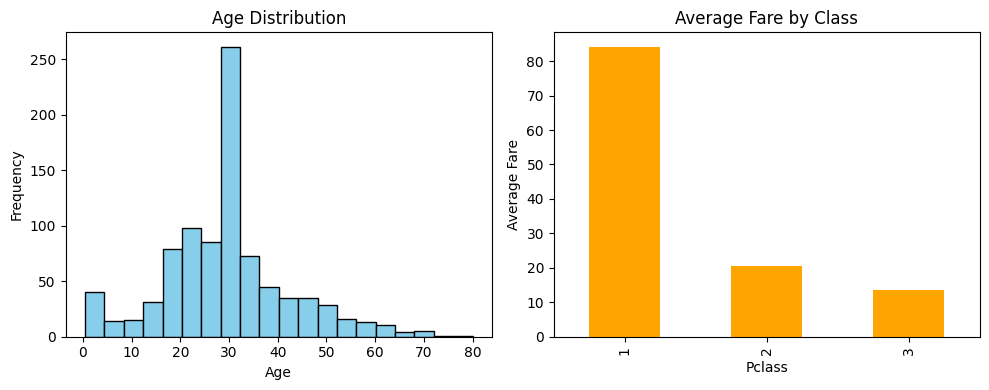

In [14]:
# 1_csv_exploration.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset from seaborn
df = pd.read_csv("/content/Titanic.csv")

# 1. Load & Inspect
print("First 10 rows:\n", df.head(10))
print("\nShape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)

# 2. Summary Statistics
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().mean())

# Fill missing numeric values with mean
for col in df.select_dtypes(include="number").columns:
    df[col] = df[col].fillna(df[col].mean())

# 3. Filter & Sort
filtered_df = df[df["Age"] > 30]
sorted_df = df.sort_values(by="Fare", ascending=False)
print("\nFiltered (Age > 30):\n", filtered_df.head())
print("\nSorted by fare descending:\n", sorted_df.head())

# 4. Group & Aggregate
group_avg = df.groupby("Pclass")["Fare"].mean()
print("\nAverage Fare by Class:\n", group_avg)

# 5. Visualizations
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(df["Age"], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
group_avg.plot(kind="bar", color='orange')
plt.title("Average Fare by Class")
plt.ylabel("Average Fare")

plt.tight_layout()
plt.show()

# Extra Challenge: Save cleaned dataset
df.to_csv("processed_data.csv", index=False)

2. Decision Tree Classifier
📂 Dataset Source: Iris dataset from scikit-learn.

Accuracy: 1.0


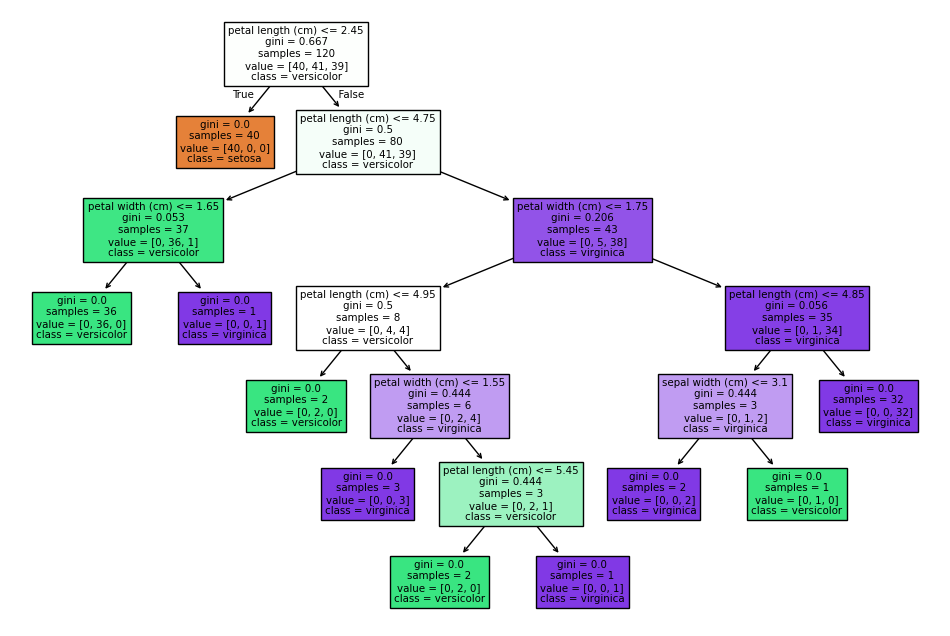

In [4]:
# 2_decision_tree.py

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Accuracy
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


3. Text Processing with NLTK
📂 Dataset Source: Short paragraph from BBC News (example text given).

In [11]:
# 3_nltk_text_processing.py

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


# Example paragraph
text = """Aug 11 (Reuters) - Nvidia (NVDA.O), opens new tab and Advanced Micro Devices (AMD.O), opens new tab have agreed to give the U.S. government 15% of revenue from sales to China of certain advanced computer chips, a U.S. official said on Sunday, in an unusual move likely to faze American companies.
The deal is extremely rare for the U.S. and marks President Donald Trump's latest intervention in corporate decision-making, after pressuring executives to invest in American manufacturing and demanding new Intel CEO Lip-Bu Tan resign over ties to Chinese companies.
The Reuters Daily Briefing newsletter provides all the news you need to start your day. Sign up here.
Advertisement · Scroll to continue

Report This Ad
Analysts said the levy may hit margins at the chipmakers and set a precedent for Washington to tax critical U.S. exports, potentially extending beyond semiconductors.
Trump's administration halted sales of Nvidia's H20 chips to China in April, but the company said last month it had won clearance to resume shipments and hoped to start deliveries soon.
The Commerce Department has started issuing licenses for the sale of H20 chips to China, another U.S. official said on Friday. Both the U.S. officials declined to named because details have not been made public.
The China curbs are expected to cost Nvidia and AMD billions of dollars in revenue, and successive U.S. administrations have sought in recent years to limit Beijing's access to cutting-edge chips that could bolster China's military.
Advertisement · Scroll to continue
Washington does not feel the sale of H20 and equivalent chips compromises national security, said the first U.S. official.
The official did not know when or how the agreement with the chip companies would be implemented, but said the administration would be in compliance with the law.
The U.S. Constitution prohibits Congress from laying taxes and duties on articles exported from any state. The Export Clause applies to taxes and duties, not user fees.
When asked if Nvidia had agreed to pay 15% of revenues to the U.S., a company spokesperson said: "We follow rules the U.S. government sets for our participation in worldwide markets."
"While we haven't shipped H20 to China for months, we hope export control rules will let America compete in China and worldwide," the spokesperson added.
A spokesperson for AMD said the U.S. approved its applications to export some AI processors to China, but did not directly address the revenue-sharing agreement and said the company's business adheres to all U.S. export controls.

The U.S. Commerce Department did not immediately comment.
China's foreign ministry said the country has repeatedly stated its position on U.S. chip exports. The ministry has previously accused Washington of using technology and trade measures to "maliciously contain and suppress China."
The logo of Nvidia Corporation is seen during the annual Computex computer exhibition in Taipei
The logo of Nvidia Corporation is seen during the annual Computex computer exhibition in Taipei, Taiwan May 30, 2017. REUTERS/Tyrone Siu/File Photo Purchase Licensing Rights, opens new tab
The Financial Times, which first reported the development, said the chip firms agreed to the arrangement as a condition for obtaining the export licenses for their semiconductors, including AMD's MI308 chips. It added that the Trump administration had yet to determine how to use the money.
"The Chinese market is significant for both these companies so even if they have to give up a bit of the money, they would otherwise make it looks like a logical move on paper," AJ Bell investment director Russ Mould said.
'SLIPPERY SLOPE'
Still, analysts and experts questioned the logic of resuming sales if the chips could pose a national security risk.
"Decisions on export licenses should be determined by national security considerations and the tradeoffs of U.S. policy goals, not a revenue-creating possibility," said Martin Chorzempa, senior fellow at the Peterson Institute for International Economics, an independent research institution.
"What it ends up creating is an incentive to control things, to then extract a payment, rather than controlling things because we're actually concerned about the risk to national security."
U.S. Commerce Secretary Howard Lutnick said last month the planned resumption of sales of the AI chips was part of U.S. negotiations with China to get rare earths and described the H20 as Nvidia's "fourth-best chip" in an interview with CNBC.
He said it was in U.S. interests for Chinese firms to use American technology, even if the most advanced chips remained barred, to keep them on a U.S. "tech stack".
Some elements of Trump's trade policy are already facing legal scrutiny, with a federal appeals panel skeptical of his claim that a 1977 law, traditionally used to sanction enemies or freeze assets, also empowered him to impose tariffs.
"We aren't sure we like the precedent this sets," Bernstein analysts said of the revenue-share deal. "Will it stop with Chinese AI? Will it stop with controlled products? Will other companies be required to pay to sell into the region?"
"It feels like a slippery slope to us."
The analysts estimated the deal would cut gross margins on the China-bound processors by 5 to 15 percentage points, shaving about a point from Nvidia and AMD's overall margins.
Nvidia generated $17 billion in revenue from China in the fiscal year ending January 26, representing 13% of total sales. AMD reported $6.2 billion in China revenue for 2024, accounting for 24% of total revenue.
Nvidia has warned a China sales halt for H20 chips could cut $8 billion from July-quarter revenue, while AMD has projected a $1.5 billion annual hit from the curbs.
Reporting by Karen Freifeld Additional reporting by Arsheeya Bajwa, Yazhini MV and Gnaneshwar Rajan in Bengaluru, Liam Mo and Che Pan in Beijing. Editing by Jamie Freed, Miyoung Kim, Mark Potter and Devika Syamnath"""

# Tokenization
tokens = word_tokenize(text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [w for w in tokens if w.lower() not in stop_words and w.isalpha()]

# POS Tagging
pos_tags = nltk.pos_tag(filtered_tokens)

# Count nouns, verbs, adjectives
counts = Counter(tag for word, tag in pos_tags)
nouns = sum(counts[tag] for tag in counts if tag.startswith('NN'))
verbs = sum(counts[tag] for tag in counts if tag.startswith('VB'))
adjectives = sum(counts[tag] for tag in counts if tag.startswith('JJ'))

print("Tokens:", filtered_tokens)
print("POS Tags:", pos_tags)
print(f"Nouns: {nouns}, Verbs: {verbs}, Adjectives: {adjectives}")

Tokens: ['Aug', 'Reuters', 'Nvidia', 'opens', 'new', 'tab', 'Advanced', 'Micro', 'Devices', 'opens', 'new', 'tab', 'agreed', 'give', 'government', 'revenue', 'sales', 'China', 'certain', 'advanced', 'computer', 'chips', 'official', 'said', 'Sunday', 'unusual', 'move', 'likely', 'faze', 'American', 'companies', 'deal', 'extremely', 'rare', 'marks', 'President', 'Donald', 'Trump', 'latest', 'intervention', 'corporate', 'pressuring', 'executives', 'invest', 'American', 'manufacturing', 'demanding', 'new', 'Intel', 'CEO', 'Tan', 'resign', 'ties', 'Chinese', 'companies', 'Reuters', 'Daily', 'Briefing', 'newsletter', 'provides', 'news', 'need', 'start', 'day', 'Sign', 'Advertisement', 'Scroll', 'continue', 'Report', 'Ad', 'Analysts', 'said', 'levy', 'may', 'hit', 'margins', 'chipmakers', 'set', 'precedent', 'Washington', 'tax', 'critical', 'exports', 'potentially', 'extending', 'beyond', 'semiconductors', 'Trump', 'administration', 'halted', 'sales', 'Nvidia', 'chips', 'China', 'April', 'com

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


4. K-Means Clustering with Visualization
📂 Dataset Source: Generated dataset using make_blobs.

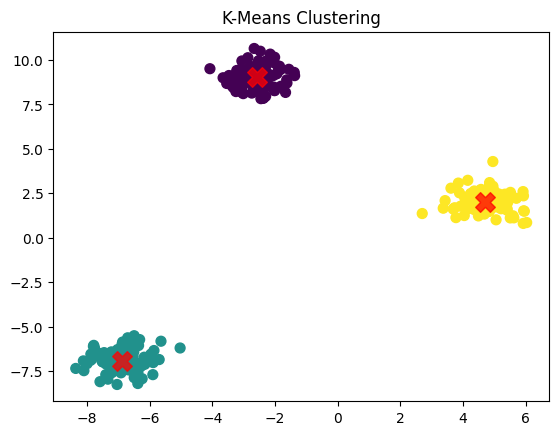

In [12]:
# 4_kmeans_clustering.py

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate data
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering")
plt.show()


5. Confusion Matrix Plot
📂 Dataset Source: Iris dataset from scikit-learn.

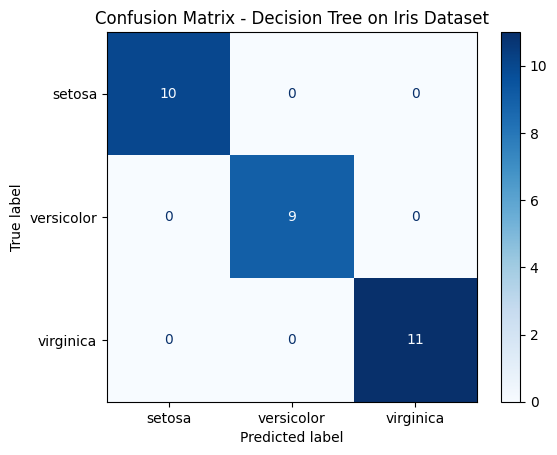

In [13]:
# 5_confusion_matrix.py

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict & plot confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=iris.target_names, cmap='Blues')
plt.title("Confusion Matrix - Decision Tree on Iris Dataset")
plt.show()
